# Preprocessing

In [52]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


heart_df = pd.read_csv("./Resources/heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
# Determine the number of unique values in each column.
heart_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [12]:
columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for column in columns:
    values = np.array(heart_df[column].unique())
    
    heart_df[f'{column}_num'] = heart_df.apply(lambda row: np.where(values == row[column])[0][0],axis=1)
    
heart_df.head()
    

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_num,ChestPainType_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,0,0,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,1,0,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0,1,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,2,0,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,0,0


In [13]:
numeric_df=heart_df.drop(columns=columns,axis=1)
numeric_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_num,ChestPainType_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num
0,40,140,289,0,172,0.0,0,0,0,0,0,0
1,49,160,180,0,156,1.0,1,1,1,0,0,1
2,37,130,283,0,98,0.0,0,0,0,1,0,0
3,48,138,214,0,108,1.5,1,1,2,0,1,1
4,54,150,195,0,122,0.0,0,0,1,0,0,0


In [14]:
# Split our preprocessed data into our features and target arrays
y=numeric_df['HeartDisease']
X=numeric_df.drop(columns='HeartDisease',axis=1)

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=50)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [61]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

input_features_cnt=len(X_train_scaled[0])
hidden_nodes_layer1=30
hidden_nodes_layer2=10


# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=input_features_cnt,activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation='relu'))



# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 30)                360       
                                                                 
 dense_31 (Dense)            (None, 10)                310       
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
# Train the model
fit_model=nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.6120 - accuracy: 0.6497
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7674
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8110
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8358
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8358
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8416
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8503
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8547
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8605
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8634
Epoch 11/

22/22 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9084
Epoch 84/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9113
Epoch 85/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9099
Epoch 86/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9070
Epoch 87/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9099
Epoch 88/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9157
Epoch 89/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9099
Epoch 90/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9172
Epoch 91/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9186
Epoch 92/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9186
Epoch 93/100


In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.3233 - accuracy: 0.8652 - 208ms/epoch - 26ms/step
Loss: 0.32334405183792114, Accuracy: 0.865217387676239


In [65]:
# Export our model to HDF5 file
nn.save('TrainedModel.h5')

HeartDisease
0    410
1    508
Name: HeartDisease, dtype: int64


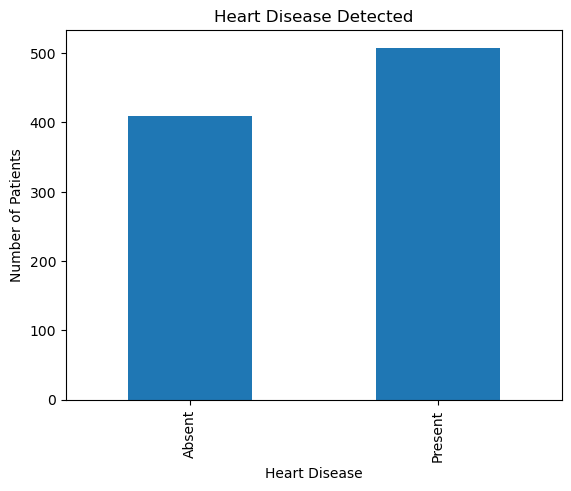

In [66]:
plot_df=heart_df.groupby('HeartDisease')["HeartDisease"].count()

print(plot_df)
img=plot_df.plot(kind='bar')
plt.title("Heart Disease Detected")
plt.xlabel("Heart Disease")
plt.ylabel("Number of Patients")
img.set_xticklabels(['Absent','Present'])
plt.show()

In [53]:
plt.figure()

for i,module in enumerate(nn.layers):
    if i == len(nn.layers) - 1:
        i=-1
    module.draw(i)

plt.axis('scaled')
plt.axis('off')
plt.show()


AttributeError: 'Dense' object has no attribute 'draw'

<Figure size 640x480 with 0 Axes>

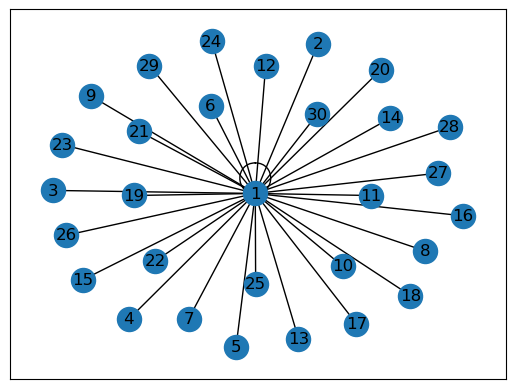

In [57]:
g = nx.Graph()
start = [1]
for layer in nn.layers:
    units = layer.units
    for edges in range(start,start+units):
        g.add_edge(start,edges)
    

nx.draw_networkx(g, with_labels=True)